# Künstliche Intelligenz

In diesem Teil beschäftigen wir uns mit künstlicher Intelligenz. Genauer gesagt
beschäftigen wir uns mit *maschinellem Lernen*. Beim maschinellem Lernen geht
es darum das der Computer eigenständig aus den Daten die er gegeben hat lernen
kann. Eine sehr häufige Anwendung davon ist **Klassifizierung**.

Ein Beispiel für Klassifizierung ist wenn der Computer aufgrund der ihm zur
Verfügung stehenden Daten entscheiden muss um welche Art von Frucht er sich
handelt.


**Aufgabe:**
> In der nächsten Zelle ist ein Datensatz beschrieben, versuchen Sie sich zu
> überlegen wie Sie die Daten so aufteilen können, dass sie eindeutig
> klassifiziert werden können. Teilen Sie Ihre Erkenntnis mit Ihrem
> Sitznachbarn.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

df = pd.DataFrame([
  [117, 'Banane'],
  [130, 'Banane'],
  [234, 'Apfel'],
  [221, 'Apfel'],
  [239, 'Apfel'],
  [122, 'Banane'],
  [200, 'Apfel'],
  [92, 'Banane'],
  [187, 'Apfel'],
  [276, 'Apfel'],
  [88, 'Banane'],
  [110, 'Banane'],
  [240, 'Apfel'],
  [212, 'Apfel'],
  [232, 'Apfel'],
  [115, 'Banane'],    
], columns=['Gewicht', 'Frucht'])
df.head(16)

,Gewicht,Frucht
0,117,Banane
1,130,Banane
2,234,Apfel
3,221,Apfel
4,239,Apfel
5,122,Banane
6,200,Apfel
7,92,Banane
8,187,Apfel
9,276,Apfel


Sie sehen in diesem Beispiel dass Sie aufgrund vom Gewicht ganz eindeutig
korrekt klassifizieren können. 

## Datensatz

In der *KI* spricht man von einem Datensatz wenn die Daten in einer Form so ähnlich wie oben vorliegen. Man kann einen Datensatz normalerweise als Tabelle darstellen. Eine Zeile in dem Datensatz, entspricht immer einem Eintrag. Wenn Sie sich die Zeile **0** anschauen, sehen Sie das es sich um den Datenpunkt (Eintrag) mit dem **Gewicht** 117 und der **Frucht** Banane handelt.

In diesem Beispiel ist das **Gewicht** ein *Feature* und **Frucht** ist das *Label*. In der *KI* geht es sehr oft darum das *Label* aufgrund der *Features* automatisiert zu erraten. In diesem Beispiel wäre die *KI* ganz einfach: Ist das Gewicht kleiner als 160 handelt es sich um eine Banana.

Damit man das noch ein wenig schneller sehen
kann, finden Sie in der nächsten Zelle eine Grafik welche jeden Datenpunkt
darstellt. Weil wir nur das Gewicht der Früchte betrachten, gibt es nur eine
lineare Verteilung der Punkte.

In [2]:
sns.relplot(x='Gewicht', y=np.linspace(0, 0, len(df)), data=df, hue='Frucht')

<IPython.core.display.Javascript object>

Sie sehen an der Grafik bereits das die Punkte unterschiedlich eingefärbt sind.
Das können wir hier machen, da wir hier mit dem sogenannten *Trainingsset*
arbeiten. Beim *Trainingsset* handelt es sich um Daten zu denen wir die Antwort
bereits kennen. Diese Daten werden dann verwendet um eine *künstliche
Intelligenz* zu trainieren.

Für diesen Datensatz ist es sehr einfach eine *KI* zu trainieren. Wir müssen
nur fragen ob das Gewicht grösser als $160$ ist, dann wird es sich um einen
Apfel handeln. Und genau das machen wir hier. Die *KI* soll eine neue Frucht
die wir bis jetzt noch nicht in Datensatz hatten, klassifizieren.

**Aufgabe:**
> Führen Sie die nächste Zelle aus. Die fügt in den Plot von oben 2 neue
> Punkte ein, die noch nicht klassifiziert sind. Können Sie erraten welcher
> Punkt welches Label erhalten soll? Diskutieren Sie Ihre Lösung mit Ihrem
> Sitznachbarn.

In [52]:
df = df.append({'Gewicht': 100, 'Frucht': 'unbekannt'}, ignore_index=True)
df = df.append({'Gewicht': 210, 'Frucht': 'unbekannt'}, ignore_index=True)
sns.relplot(x='Gewicht', y=np.linspace(0, 0, len(df)), data=df, hue='Frucht')

<IPython.core.display.Javascript object>

## Super!

Das war mal wieder viel zu einfach für Sie! Das Beispiel soll Ihnen aufzeigen
wie die *KI* hier vorgehen würde. Es wird schon noch ein wenig schwieriger.

Auf dem Markt ist eine neue Art von Apfel aufgetreten. Es handelt sich hier um
Baby-Äpfel. Diese sind sehr klein und von daher auch relativ leicht. Es handelt
sich allerdings immer noch um Äpfel.

**Aufgabe:**
> In der nächsten Zelle finden Sie einen neuen Datensatz. Wenn Sie die Zelle
> ausführen, wird der Datensatz gleich geplottet. Diskutieren Sie mit Ihrem
> Sitznachbarn wie Sie den Datensatz klassifizieren würden.



In [4]:
df = pd.DataFrame([
    [117, 'Banane'],
    [130, 'Banane'],
    [234, 'Apfel'],
    [221, 'Apfel'],
    [239, 'Apfel'],
    [122, 'Banane'],
    [200, 'Apfel'],
    [92, 'Banane'],
    [187, 'Apfel'],
    [276, 'Apfel'],
    [89, 'Banane'],
    [110, 'Banane'],
    [240, 'Apfel'],
    [212, 'Apfel'],
    [232, 'Apfel'],
    [115, 'Banane'],
    [50, 'Apfel'],
    [75, 'Apfel'],
    [62, 'Apfel'],
    [81, 'Apfel'],
], columns=['Gewicht', 'Frucht'])

sns.relplot(x='Gewicht', y=np.linspace(0, 0, len(df)), data=df, hue='Frucht')

<IPython.core.display.Javascript object>

Das klassifizieren ist nicht weiter schwer in diesem Fall, Sie müssen einfach 2
Fragen statt nur einer Frage stellen.

## Entscheidungsbäume

Hier kommen nun sogenannte *Entscheidungsbäume* ins Spiel. Ein
Entscheidungsbaum besteht aus mehreren Fragen, die nacheinander gestellt
werden. Wenn keine Fragen mehr übrig sind, dann ist der Baum bei einer
Entscheidung angelangt, und gibt eine Klassifizierung für den aktellen
Datenpunkt an.

In der nächsten Zelle finden Sie ein Beispiel für so einen Entscheidungsbaum.
In der Zelle wird er von Hand aufgebaut und folgt einigen ganz einfachen
Regeln.

**Regeln:**
> - Es gibt immer einen Wurzelknoten.
> - Jeder Knoten hat genau 2 Kinder, ein linkes und ein rechtes.
> - Jeder Knoten hat genau eine Frage.
> - Die Frage ist immer gestellt ob ein Wert kleiner gleich ist.
> - Wird die Frage mit JA beantwortet, gehen wir zum linken Kind, sonst zum
>   rechten.
> - Knoten am Ende des Baumes sind Blätter, und haben ein Label.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code und Kommentare. Führen Sie die Zelle
> aus, um zu sehen was passiert. Diskutieren Sie das mit Ihrem Sitznachbarn.
>
> Versuchen Sie mit Hilfe von Ihrem Sitznachbarn alle Kommentare im Code zu
> verstehen, und versuchen Sie dann den Baum zu verändern.

In [6]:
from lib.mytree import *

# Hier wird ein neuer Baum erzeugt. Diesem Baum wird gerade die Wurzel
# übergeben, die bereits eine erste Frage enthält.
# Die Frage hier lautet: Ist der Wert kleiner gleich 80?
# Die 0 gibt an um welche Spalte es sich handelt, da wir im Moment nur auf das
# Gewicht schauen, haben alle den Wert 0.
dt = DesicionTree(
    Node(Question(0, 80)))

# Hier holen wir uns von dem Baum den Wurzelknoten, und hängen als linkes Kind
# ein Blatt an. Das machen wir weil alles was mit der Frage: Ist das Gewicht
# kleiner als 80 beantwortet werden kann, ein Apfel ist.
dt.root.add_left_child(Leaf('Apfel'))

# Wir holen wieder den Wurzel Knoten, und fügen das rechte Kind hinzu. Dies ist
# ein normaler Knoten, da wir hier noch eine weitere Frage stellen müssen.
# Die Frage hier lautet: Ist das Gewicht kleiner als 160?
dt.root.add_right_child(
    Node(Question(0, 160)))

# Wir fügen dem rechten Kind des Wurzelknotens ein linkes Kind an, welches ein
# Blatt ist. Hier handelt es sich um Bananen.
dt.root.right.add_left_child(Leaf('Banane'))
dt.root.right.add_right_child(Leaf('Apfel'))


# Der Code hier, geht über den Datensatz und klassifiziert alle Datenpunkte so
# wie sie durch den Baum klassifiziert werden.
for data in df.to_numpy():
    print(f"Datenpunkt: {data}\tVorhersage: {dt.predict(data)}")

Datenpunkt: [117 'Banane']	Vorhersage: Banane
Datenpunkt: [130 'Banane']	Vorhersage: Banane
Datenpunkt: [234 'Apfel']	Vorhersage: Apfel
Datenpunkt: [221 'Apfel']	Vorhersage: Apfel
Datenpunkt: [239 'Apfel']	Vorhersage: Apfel
Datenpunkt: [122 'Banane']	Vorhersage: Banane
Datenpunkt: [200 'Apfel']	Vorhersage: Apfel
Datenpunkt: [92 'Banane']	Vorhersage: Banane
Datenpunkt: [187 'Apfel']	Vorhersage: Apfel
Datenpunkt: [276 'Apfel']	Vorhersage: Apfel
Datenpunkt: [89 'Banane']	Vorhersage: Banane
Datenpunkt: [110 'Banane']	Vorhersage: Banane
Datenpunkt: [240 'Apfel']	Vorhersage: Apfel
Datenpunkt: [212 'Apfel']	Vorhersage: Apfel
Datenpunkt: [232 'Apfel']	Vorhersage: Apfel
Datenpunkt: [115 'Banane']	Vorhersage: Banane
Datenpunkt: [50 'Apfel']	Vorhersage: Apfel
Datenpunkt: [75 'Apfel']	Vorhersage: Apfel
Datenpunkt: [62 'Apfel']	Vorhersage: Apfel
Datenpunkt: [81 'Apfel']	Vorhersage: Banane


## Toll

Das ist ja schön und gut, aber das ganze scheint ein wenig aufwendig für so ein
einfaches erfundenes Beispiel zu sein...

Nun betrachten wir ein Datensatz der nicht mehr ganz so einfach klassifiziert
werden kann. In der Realität ist es so dass ein Datenpunkt mehr wie nur 1 *Feature* hat. In dem Beispiel in der nächsten Zelle, ist noch ein weiteres *Feature* hinzu gekommen. Bei dem *Feature* ist nicht ganz klar was es messen soll. Das spielt für die *KI* auch keine Rolle, denn für die *KI* ist nur wichtig dass die Daten durch die *Features* unterteilt werden können.

**Aufgabe:**
> Führen Sie die nächste Zelle aus, und diskutieren Sie mit Ihrem Sitznachbarn
> was Sie beobachten. Wie können Sie den neuen Datensatz klassifizieren?

In [8]:
df = pd.DataFrame([
    [117, 82, 'Banane'],
    [130, 81, 'Banane'],
    [234, 95, 'Apfel'],
    [221, 70, 'Apfel'],
    [239, 86, 'Apfel'],
    [122, 87, 'Banane'],
    [200, 62, 'Apfel'],
    [92, 43, 'Banane'],
    [187, 115, 'Apfel'],
    [276, 99, 'Apfel'],
    [89, 82, 'Banane'],
    [110, 61, 'Banane'],
    [240, 84, 'Apfel'],
    [212, 111, 'Apfel'],
    [232, 92, 'Apfel'],
    [115, 80, 'Banane'],
    [90, 120, 'Apfel'],
    [112, 130, 'Apfel'],
    [105, 122, 'Apfel'],
    [99, 128, 'Apfel'],
], columns=['Gewicht', 'Irgendwas', 'Frucht'])

sns.relplot(x='Gewicht', y='Irgendwas', data=df, hue='Frucht')

<IPython.core.display.Javascript object>

Die Grafik zeigt hier ganz deutlich dass das **Gewicht** alleine nicht mehr ausreicht um die Datenpunkte zu trennen. Wir müssen auch das zusätzliche *Feature* (**Irgendwas**) berücksichtigen.

**Aufgabe:**
> Schreiben Sie Code der Ihnen einen Baum erzeugt der diesen Datensatz
> Klassifiziert.
>
> **Tipp:** Kopieren Sie den Code von oben, und passen Ihn so an dass er für
> den neuen Datensatz funktioniert.
>
> **Tipp:** Wenn Sie bei `Question` eine 1 statt eine 0 verwenden, betrachtet
> er die zweite Spalte.

## Mehrere Dimensionen

Sie sehen dass es möglich ist eine Separierung der Daten zu erreichen, auch wenn die nur auf Grund vom **Gewicht** nicht möglich ist. Hier haben wir ein weiteres *Feature* benötigt, und daher sprechen wir von einem 2-dimensionalen Datensatz. Die Anzahl der Dimensionen wird durch die Anzahl der *Features* in einem Datensatz bestimmt.

Bei 2 Dimensionen kann man das ganze noch sehr schön in einer Grafik darstellen, und oft kann man die Zerlegung dann auch direkt sehen. Es ist auch für 3 Dimensionen noch gut vorstellbar wie man den Datensatz zerteilen kann. In der Praxis hat man aber sehr oft mit viel mehr wie 3 Dimensionen zu tun. Da wird es dann eher schwer diese Daten so darzustellen, dass die noch übersichtlich sind. Eine Möglichkeit das zu machen, ist ein sogennanter *Pair-Plot*.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der Ihnen ein Datensatz mit 4
> Dimensionen beschreibt, und einen *Pair-Plot* von den Daten erzeugt.
>
> Diskutieren Sie mit Ihrem Sitznachbarn ausführlich was Sie hier sehen, und versuchen Sie die Grafik zu verstehen.

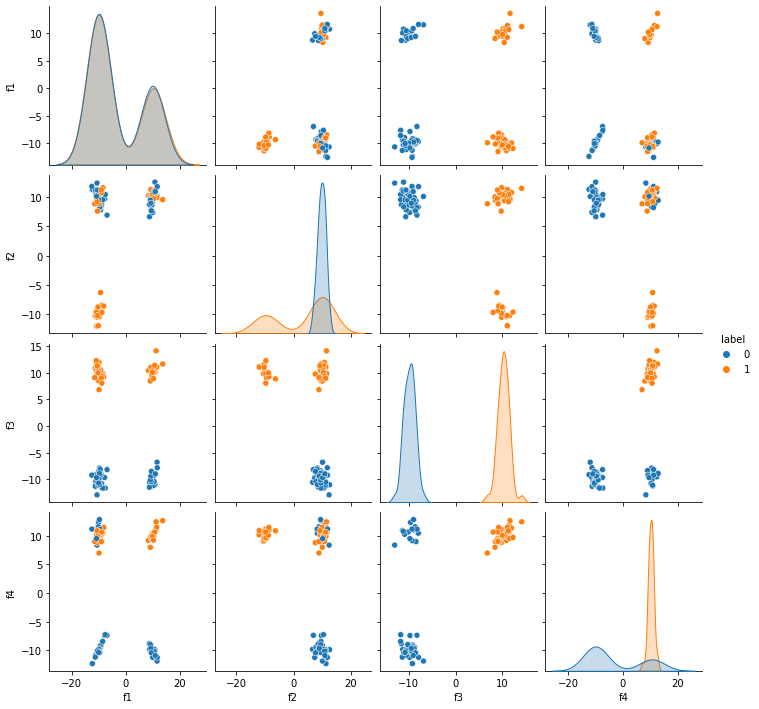

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, n_informative=4, n_redundant=0, n_repeated=0, class_sep=10, n_clusters_per_class=3)
X = pd.DataFrame(X, columns=['f1', 'f2', 'f3', 'f4'])
y = pd.DataFrame(y, columns=['label'])
tmp = pd.concat([X, y], axis=1)
sns.pairplot(tmp, x_vars=['f1', 'f2', 'f3', 'f4'], y_vars=['f1', 'f2', 'f3', 'f4'], hue='label')

## Pair-Plot

Der *Pair-Plot* zeigt Ihnen jedes *Feature* gegen jedes andere *Feature* und auch gegen sich selbst geplotet. Wenn die Daten so liegen das der Plot von einem *Feature* mit sich selbst **keine** Überschneidung hat, dann ist der Entscheidungsbaum sehr einfach, und hat nur einen Knoten. Der Fall tritt aber nicht sehr oft auf.

## Automatisches Lernen

Wenn Wir diese Bäume immer von Hand erstellen müssten, würde die sehr viel Arbeit kosten, und ist auch sehr Fehleranfällig. Man würde vermutlich auch nicht von *künstlicher Intelligenz* sprechen, wenn man die Bäume alle von Hand erstellen müsste. Zum Glück wurde die automatische Erstellung bereits für uns implementiert, und wir können diese einfach verwenden.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der einen Entscheidungsbaum von dem oben erzeugten Datensatz lernt. Nach dem lernen wird der Baum ausgegeben.
>
> Diskutieren Sie mit Ihrem Sitznachbarn was genau Sie sehen.
>
> Schauen Sie auf die erste Zeile in jedem Knoten, und verbinden Sie Ihre Beobachtung mit dem *Pair-Plot*.

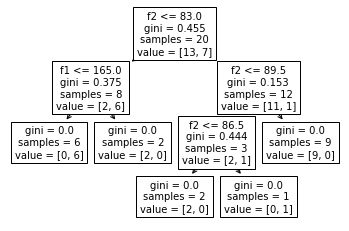

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as t
%matplotlib inline

tree = DecisionTreeClassifier()
tree.fit(X, y)
p = t.plot_tree(tree, feature_names=['f1', 'f2', 'f3', 'f4'])

Einen zufällig erstellten Datensatz zu betrachten macht nicht so viel Spass. Zum Glück können wir den Baum auch auf dem von uns erzeugen Datensatz mit den Äpfeln und Bananen trainieren.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der Ihnen den Datensatz erzeugt, diesen im *Pair-Plot* ausgibt. In der Zelle übernächsten Zelle finden Sie den Code welcher dann den Baum trainiert und ausgibt.
>
> Führen Sie beide Zellen aus, und diskutieren Sie mit Ihrem Sitznachbarn was Sie sehen.
>
> Nehmen Sie sich einen Datenpunkt aus dem Datensatz, und machen Sie den Weg durch den Entscheidungsbaum.
>
> Ändern Sie den Datensatz so ab, dass er für Sie interessant wird.

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

df = pd.DataFrame([
    [117, 82, 'Banane'],
    [130, 81, 'Banane'],
    [234, 95, 'Apfel'],
    [221, 70, 'Apfel'],
    [239, 86, 'Apfel'],
    [122, 87, 'Banane'],
    [200, 62, 'Apfel'],
    [92, 43, 'Banane'],
    [187, 115, 'Apfel'],
    [276, 99, 'Apfel'],
    [89, 82, 'Banane'],
    [110, 61, 'Banane'],
    [240, 84, 'Apfel'],
    [212, 111, 'Apfel'],
    [232, 92, 'Apfel'],
    [115, 80, 'Banane'],
    [90, 120, 'Apfel'],
    [112, 130, 'Apfel'],
    [105, 122, 'Apfel'],
    [99, 128, 'Apfel'],
], columns=['Gewicht', 'Irgendwas', 'Frucht'])

sns.pairplot(df, x_vars=['Gewicht', 'Irgendwas'], y_vars=['Gewicht', 'Irgendwas'], hue='Frucht')

<IPython.core.display.Javascript object>

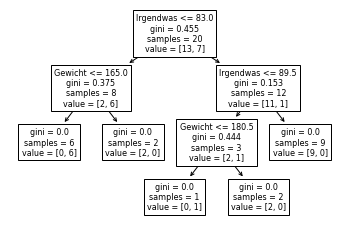

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as t
%matplotlib inline

tree = DecisionTreeClassifier()
X = df[['Gewicht', 'Irgendwas']]
y = df[['Frucht']]
tree.fit(X, y)
p = t.plot_tree(tree, feature_names=['Gewicht', 'Irgendwas'])

## Vorhersagen

Ist ein Baum einmal trainiert, können wir ihn dafür nutzen um neue Datenpunkte vorher zu sagen. Eine gut trainierte *KI* kann neue Datenpunkte mit extremer Genauigkeit vorhersagen.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der eine Vorhersage für neue Datenpunkte macht. Fügen Sie hier noch weitere Datenpunkte ein, und prüfen Sie ob dabei heraus kommt was Sie erwarten würden.

In [29]:
tree.predict([
    [111, 120],
    [90, 50]
])

array(['Apfel', 'Banane'], dtype=object)

## Zufalls-Wälder

Entscheidungsbäume sind ein sehr einfach, aber auch praktisch. Jedoch können Sie schnell an ihre Grenzen stossen.

**Aufgabe:**
> Finden Sie in einer Diskussion mit Ihrem Sitznachbarn heraus was Vor- und Nachteile von Entscheidungsbäumen sein könnten. Nutzen Sie dazu auch eine Internet Recherche.

**Aufgabe:**
> Erklären Sie Ihrem Sitznachbarn was Sie unter dem Begriff *Zufalls-Wald* verstehen